In [63]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '..')

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

%matplotlib inline

In [64]:
# dataset = 'Breast_GSE42568'
dataset = 'Colorectal_GSE44076'
# dataset = 'Leukemia_GSE63270'

n_tests = 20
n_iterations = 100

models = []
for i in range(n_tests):
	filename = f'{dataset}_{i}_it{n_iterations}_MinMaxSc_f.pkl'
	print(f'Reading test: {filename}')
	with open(f'../results/{filename}', 'rb') as f:
		problem, params, res = pickle.load(f)
	models.append(res['model'])

Reading test: Colorectal_GSE44076_0_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_1_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_2_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_3_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_4_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_5_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_6_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_7_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_8_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_9_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_10_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_11_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_12_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_13_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_14_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_15_it100_MinMaxSc_f.pkl
Reading test: Colorectal_GSE44076_16_it100_MinMaxSc_f.pkl
Reading test: Colorectal

In [65]:
train_acc = np.zeros((n_tests, n_iterations + 1))
train_fit = np.zeros((n_tests, n_iterations + 1))
test_acc = np.zeros((n_tests, n_iterations + 1))
test_fit = np.zeros((n_tests, n_iterations + 1))

for i in range(n_tests):
	train_acc[i, :] = models[i].training_accuracy.T
	train_fit[i, :] = models[i].training_fitness.T
	test_acc[i, :] = models[i].testing_accuracy.T
	test_fit[i, :] = models[i].testing_fitness.T

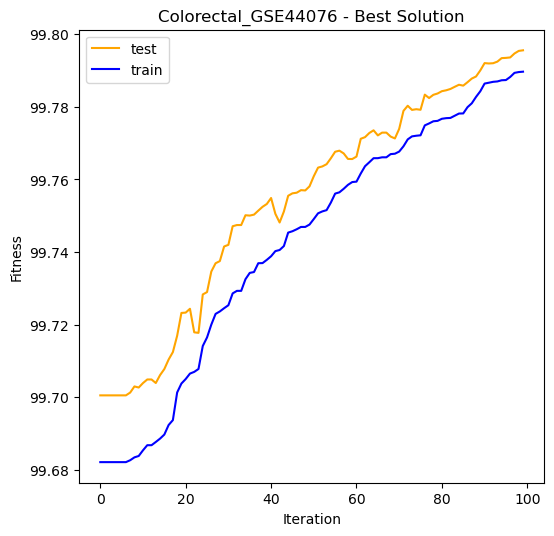

In [66]:
fig = plt.figure(figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.set_title(f'{dataset} - Best Solution')
ax.set_xlabel('Iteration')
ax.set_ylabel('Fitness')

# for test in test_fit:
#     plt.plot(test[1:], color='navajowhite')

# for test in train_fit:
#     plt.plot(test[1:], color='lightblue')

plt.plot(np.mean(test_fit[:,1:], axis=0), color='orange', label='test')
plt.plot(np.mean(train_fit[:,1:], axis=0), color='b', label='train')

ax.legend()

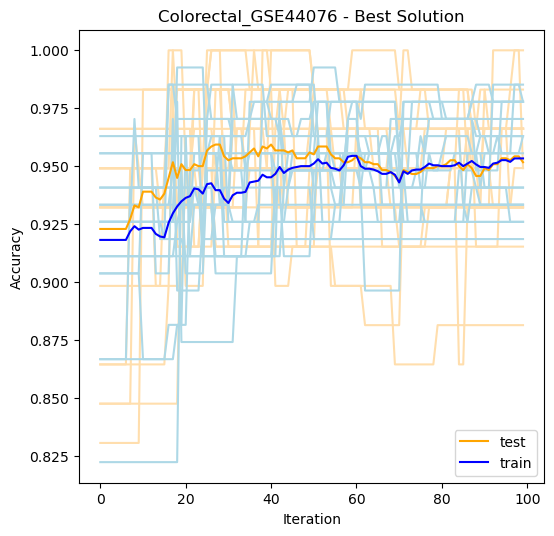

In [67]:
fig = plt.figure(figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.set_title(f'{dataset} - Best Solution')
ax.set_xlabel('Iteration')
ax.set_ylabel('Accuracy')

for test in test_acc:
    plt.plot(test[1:], color='navajowhite')

for test in train_acc:
    plt.plot(test[1:], color='lightblue')

plt.plot(np.mean(test_acc[:,1:], axis=0), color='orange', label='test')
plt.plot(np.mean(train_acc[:,1:], axis=0), color='b', label='train')

ax.legend()